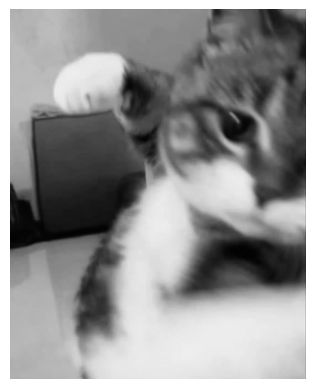

In [1]:
#Read a 500 x 500 pixel PNG image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#Load the image
img = mpimg.imread ('final_project.png')

#Display the image
plt.imshow(img)
plt.axis('off')  # Hide the axes
plt.show()

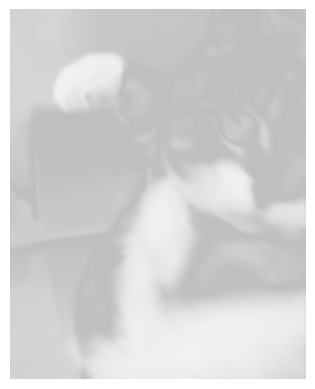

In [2]:
#Produce a blurred version of the image
from scipy.ndimage import gaussian_filter
blurred_img = gaussian_filter(img, sigma=5)

#Display the blurred image
plt.imshow(blurred_img)
plt.axis('off')  # Hide the axes
plt.show()

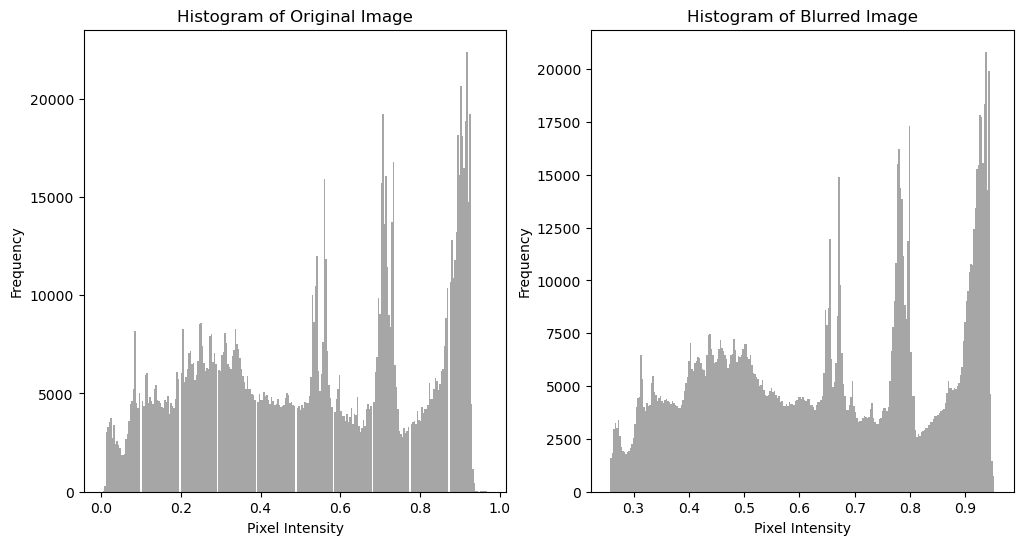

In [ ]:
#Calculate the grey scale histogram of the original image
import numpy as np
def rgb_to_grayscale(rgb):
    return np.dot(rgb[..., :3], [0.2989, 0.5870, 0.1140])
gray_img = rgb_to_grayscale(img)

#Calculate the grey scale histogram of the blurred image
gray_blurred_img = rgb_to_grayscale(blurred_img)

#Plot both histograms in a single matplotlib plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(gray_img.ravel(), bins=256, color='gray', alpha=0.7)
plt.title('Histogram of Original Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
plt.hist(gray_blurred_img.ravel(), bins=256, color='gray', alpha=0.7)
plt.title('Histogram of Blurred Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

# Why white gaps in the first histogram?
# The white gaps in the histogram of the original image may be due to the presence of certain pixel values that are not represented in the image.
# But blurring introduces interpolation, and pixels get spread out more evenly across the intensity range

In [24]:
# Use scipy stats on the histograms to see if there is any statistically significant difference, and print the results to the notebook
from scipy import stats

# Compare the binned histograms of the original and blurred images instead of raw pixels, add a small epsilon to avoid division by zero
epsilon = 1e-10
hist_original, _ = np.histogram(gray_img, bins=256, range=(0, 256))
hist_blurred, _ = np.histogram(gray_blurred_img, bins=256, range=(0, 256))
hist_blurred = hist_blurred + epsilon

# Perform a Chi-squared test to compare the two histograms
chi2_stat, p_value = stats.chisquare(hist_original, hist_blurred)

# Print the Chi-squared statistic and p-value with 4 decimal places
print(f"Chi-squared statistic: {chi2_stat:.4f}, p-value: {p_value:.4f}")

# Interpret the results
if 0.00 < p_value < 0.05:
    print("There is a statistically significant difference between the histograms of the original and blurred images.")
else:
    print("There is no statistically significant difference between the histograms of the original and blurred images.")

Chi-squared statistic: 0.0000, p-value: 1.0000
There is no statistically significant difference between the histograms of the original and blurred images.


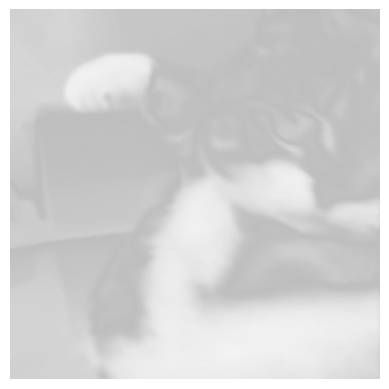

In [27]:
# Write out the blurred image as a PNG file
from PIL import Image
blurred_image_pil = Image.fromarray((blurred_img * 255).astype(np.uint8))
blurred_image_pil.save('blurred_final_project.png')

# Also write out the blurred image as a downscaled 250 x 250 pixel PNG file
blurred_image_downscaled = blurred_image_pil.resize((250, 250), Image.Resampling.LANCZOS)
blurred_image_downscaled.save('blurred_final_project_downscaled.png')

# Display the downscaled blurred image
plt.imshow(blurred_image_downscaled)
plt.axis('off')  # Hide the axes
plt.show()